##Import the required libraries and read the Dataset.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import ADASYN
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, recall_score
import matplotlib.pyplot as plt


In [3]:
autism = "/content/gdrive/MyDrive/autism_project/dataset.csv"
df = pd.read_csv(autism)
df.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,'18 and more',?,NO
5,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
6,1,1,1,1,0,0,0,0,1,0,64,m,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
7,1,1,0,0,1,0,0,1,1,1,29,m,White-European,no,no,'United States',no,6,'18 and more',Self,NO
8,1,1,1,1,0,1,1,1,1,0,17,m,Asian,yes,yes,Bahamas,no,8,'18 and more','Health care professional',YES
9,1,1,1,1,1,1,1,1,1,1,33,m,White-European,no,no,'United States',no,10,'18 and more',Relative,YES


In [4]:
df.shape

(704, 21)

##Data Preparation and EDA

In [5]:
# Finding values which are irrelevant in the dataset
cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'Class_ASD']
for col in cols:
  print(str(col )+"\t Unique values: "+str(df[col].unique()))
  print("-------------------------------------------------------------------------")

A1_Score	 Unique values: [1 0]
-------------------------------------------------------------------------
A2_Score	 Unique values: [1 0]
-------------------------------------------------------------------------
A3_Score	 Unique values: [1 0]
-------------------------------------------------------------------------
A4_Score	 Unique values: [1 0]
-------------------------------------------------------------------------
A5_Score	 Unique values: [0 1]
-------------------------------------------------------------------------
A6_Score	 Unique values: [0 1]
-------------------------------------------------------------------------
A7_Score	 Unique values: [1 0]
-------------------------------------------------------------------------
A8_Score	 Unique values: [1 0]
-------------------------------------------------------------------------
A9_Score	 Unique values: [0 1]
-------------------------------------------------------------------------
A10_Score	 Unique values: [0 1]
-----------------------

In [6]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [7]:
# Converting age column from object to integer data type

In [8]:
df["age"].replace({'?':'35'}, inplace=True)
set(df["age"].tolist())

{'17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '383',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '58',
 '59',
 '60',
 '61',
 '64'}

In [9]:
df["age"].describe()

count     704
unique     46
top        21
freq       49
Name: age, dtype: object

In [10]:
# There is an outlier in the age column where the max age is 383. So, replacing it with 38.
df["age"].replace({'383':'38'}, inplace=True)
df.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,'18 and more',?,NO
5,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
6,1,1,1,1,0,0,0,0,1,0,64,m,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
7,1,1,0,0,1,0,0,1,1,1,29,m,White-European,no,no,'United States',no,6,'18 and more',Self,NO
8,1,1,1,1,0,1,1,1,1,0,17,m,Asian,yes,yes,Bahamas,no,8,'18 and more','Health care professional',YES
9,1,1,1,1,1,1,1,1,1,1,33,m,White-European,no,no,'United States',no,10,'18 and more',Relative,YES


In [11]:
df.shape

(704, 21)

In [12]:
# Converting age from object to int64 data type
df["age"] = df["age"].astype('int64')

In [13]:
df.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                 int64
gender             object
ethnicity          object
jaundice           object
autism             object
country_of_res     object
used_app_before    object
result              int64
age_desc           object
relation           object
Class_ASD          object
dtype: object

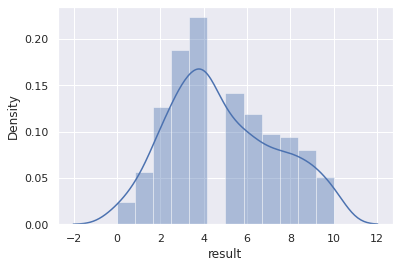

In [14]:
# Distribution of the dependent variable
sns.set()
sns.distplot(df["result"])

In [15]:
df['ethnicity'] = df['ethnicity'].replace('?',np.nan)
df['relation'] = df['relation'].replace('?',np.nan)
df.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO
5,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
6,1,1,1,1,0,0,0,0,1,0,64,m,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
7,1,1,0,0,1,0,0,1,1,1,29,m,White-European,no,no,'United States',no,6,'18 and more',Self,NO
8,1,1,1,1,0,1,1,1,1,0,17,m,Asian,yes,yes,Bahamas,no,8,'18 and more','Health care professional',YES
9,1,1,1,1,1,1,1,1,1,1,33,m,White-European,no,no,'United States',no,10,'18 and more',Relative,YES


In [16]:
df.groupby("ethnicity").count()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
ethnicity,,,,,,,,,,,,,,,,,,,,
'Middle Eastern ',92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
'South Asian',36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
Asian,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123
Black,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
Hispanic,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Latino,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Others,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
Pasifika,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Turkish,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [17]:
df['ethnicity'].fillna(df['ethnicity'].mode()[0], inplace=True)
df['relation'].fillna(df['relation'].mode()[0], inplace=True)
df.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,White-European,no,no,Egypt,no,2,'18 and more',Self,NO
5,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
6,1,1,1,1,0,0,0,0,1,0,64,m,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
7,1,1,0,0,1,0,0,1,1,1,29,m,White-European,no,no,'United States',no,6,'18 and more',Self,NO
8,1,1,1,1,0,1,1,1,1,0,17,m,Asian,yes,yes,Bahamas,no,8,'18 and more','Health care professional',YES
9,1,1,1,1,1,1,1,1,1,1,33,m,White-European,no,no,'United States',no,10,'18 and more',Relative,YES


In [18]:
# We can remove the age_desc column from df as all of them are 18 and more
df = df.drop(columns = "age_desc")
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,White-European,no,no,Egypt,no,2,Self,NO


In [19]:
# Using label encoder for converting categorical columns to numerical
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['ethnicity'] = le.fit_transform(df['ethnicity'])
df['jaundice'] = le.fit_transform(df['jaundice'])
df['autism'] = le.fit_transform(df['autism'])
df['country_of_res'] = le.fit_transform(df['country_of_res'])
df['used_app_before'] = le.fit_transform(df['used_app_before'])
df['relation'] = le.fit_transform(df['relation'])
df['Class_ASD'] = le.fit_transform(df['Class_ASD'])

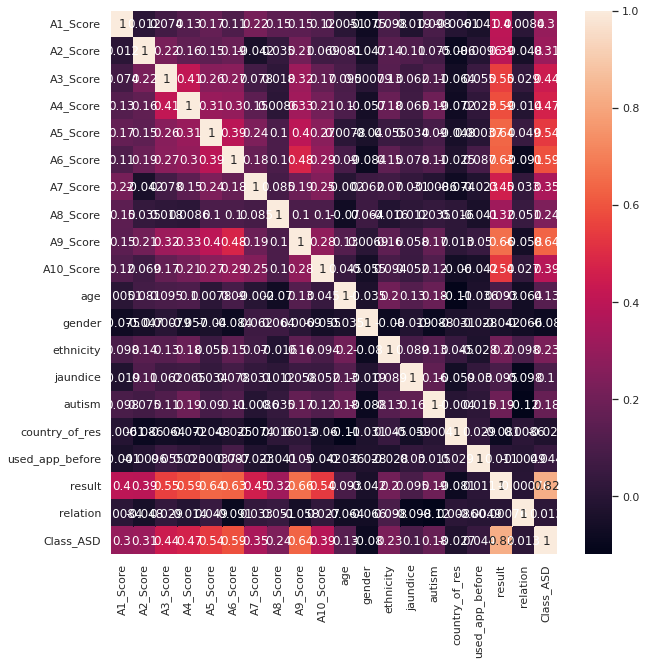

In [28]:
correlation = df.corr()
sns.heatmap(correlation, annot = True)
sns.set(rc = {'figure.figsize':(15,15)})
plt.show()

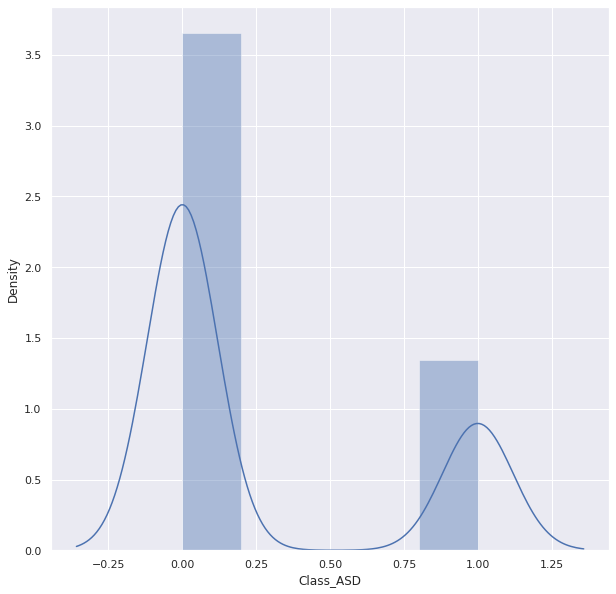

In [21]:
sns.set(rc = {'figure.figsize':(10, 10)})
sns.distplot(df["Class_ASD"])

##Train-Test-Split

In [22]:
x = df.drop(columns = "Class_ASD")
y = df["Class_ASD"]
print(x.shape, y.shape)

(704, 19) (704,)


In [23]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [24]:
# The dataset is imbalanced and thus SMOTE is used.
ad = ADASYN(random_state=100)
x0, y0 = ad.fit_sample(x,y)

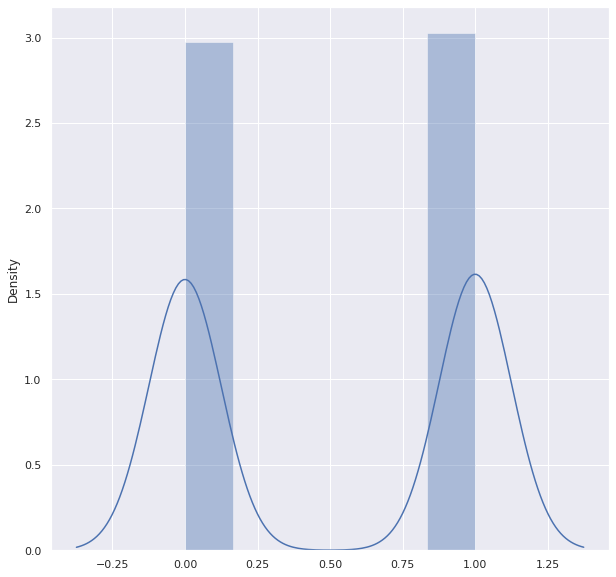

In [25]:
sns.set(rc = {'figure.figsize':(10, 10)})
sns.distplot(y0)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x0, y0, test_size = 0.2, random_state = 4)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(832, 19) (208, 19) (832,) (208,)


##Classification models

LogReg Accuracy Score is  1.0
LogReg Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       106

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

LogReg Confusion Matrix : 
 [[102   0]
 [  0 106]]
LogReg ROC_AUC_Score : 1.0


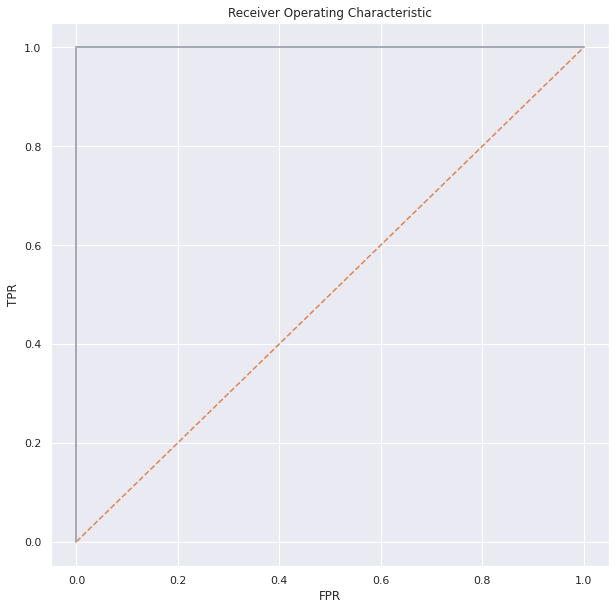

_______________________________________________________________________________________________________________________
KNC Accuracy Score is  0.9038461538461539
KNC Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89       102
           1       0.84      1.00      0.91       106

    accuracy                           0.90       208
   macro avg       0.92      0.90      0.90       208
weighted avg       0.92      0.90      0.90       208

KNC Confusion Matrix : 
 [[ 82  20]
 [  0 106]]
KNC ROC_AUC_Score : 0.9929245283018868


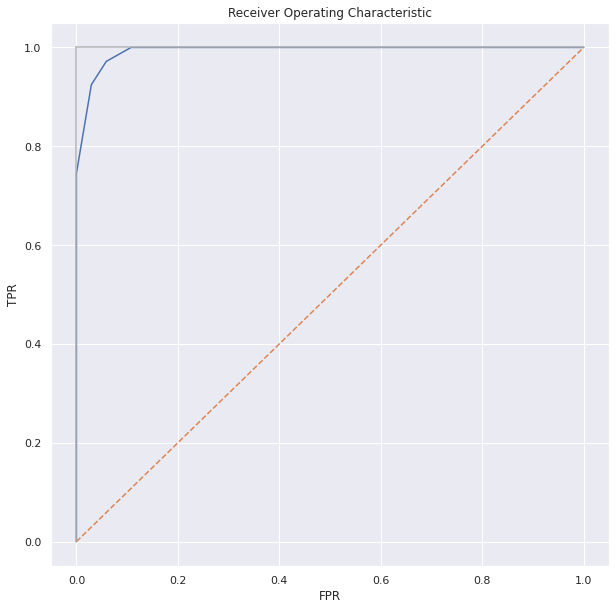

_______________________________________________________________________________________________________________________
DTC Accuracy Score is  1.0
DTC Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       106

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

DTC Confusion Matrix : 
 [[102   0]
 [  0 106]]
DTC ROC_AUC_Score : 1.0


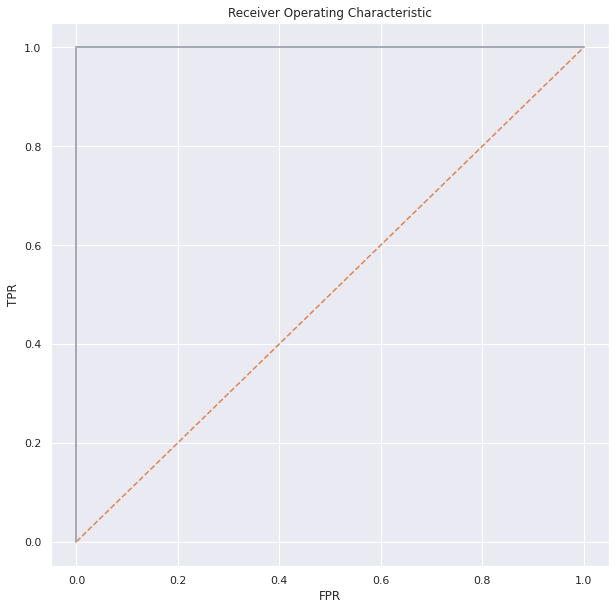

_______________________________________________________________________________________________________________________
GNB Accuracy Score is  0.9807692307692307
GNB Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       102
           1       0.97      0.99      0.98       106

    accuracy                           0.98       208
   macro avg       0.98      0.98      0.98       208
weighted avg       0.98      0.98      0.98       208

GNB Confusion Matrix : 
 [[ 99   3]
 [  1 105]]
GNB ROC_AUC_Score : 0.998520162782094


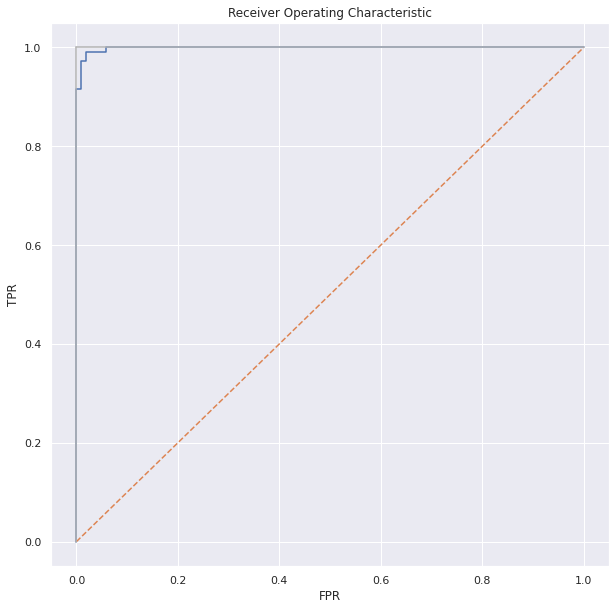

_______________________________________________________________________________________________________________________
RFC Accuracy Score is  1.0
RFC Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       106

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

RFC Confusion Matrix : 
 [[102   0]
 [  0 106]]
RFC ROC_AUC_Score : 1.0


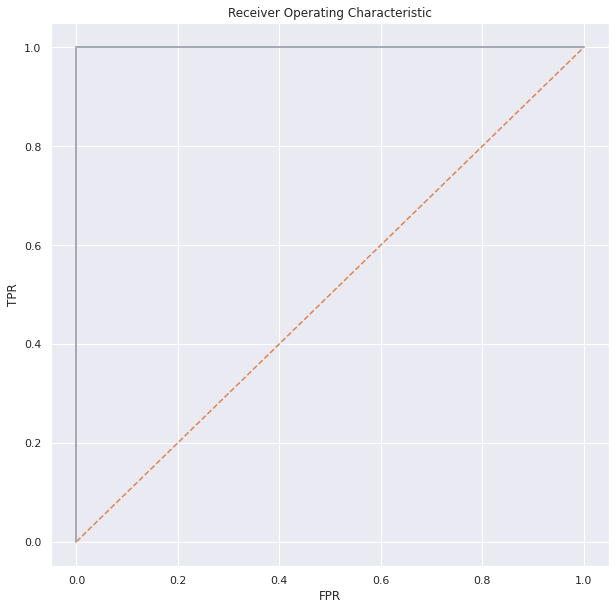

_______________________________________________________________________________________________________________________
XGB Accuracy Score is  1.0
XGB Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       106

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

XGB Confusion Matrix : 
 [[102   0]
 [  0 106]]
XGB ROC_AUC_Score : 1.0


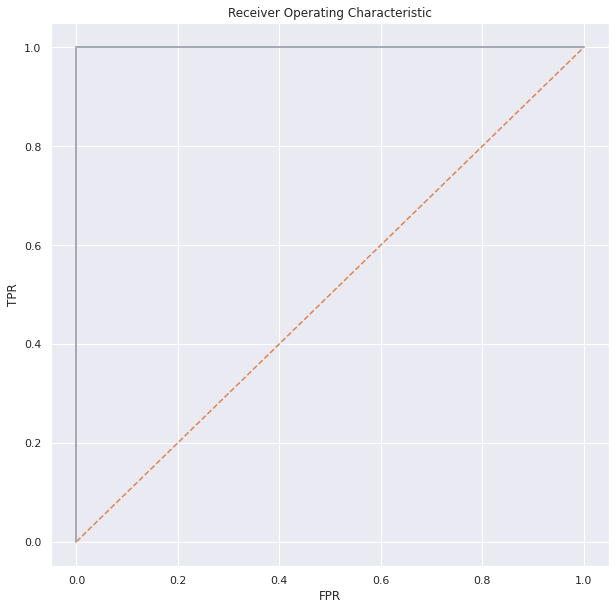

_______________________________________________________________________________________________________________________


In [27]:
models = []
models.append(('LogReg', LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')))
models.append(('KNC', KNeighborsClassifier(n_neighbors=13)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(n_estimators=500)))
models.append(('XGB', XGBClassifier()))

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(name, 'Accuracy Score is ', accuracy_score(y_test, y_pred))
    print(name, 'Classification Report : \n', classification_report(y_test, y_pred))
    print(name, 'Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
    y_score = model.predict_proba(x_test)[:,1]
    print(name, 'ROC_AUC_Score :', roc_auc_score(y_test, y_score))
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
    print("_______________________________________________________________________________________________________________________")